# The Cliff Walking

<span style="font-family: monospace; font-size:18px;">
In this Jupyter notebook, we explore Example 6.6 from Barto's Reinforcement Learning book, focusing on the Cliff Walking gridworld task to compare three key algorithms: Sarsa, Q-learning, and Expected Sarsa. This example highlights the distinctions between on-policy methods (Sarsa and Expected Sarsa) and off-policy methods (Q-learning), showcasing how each algorithm approaches the challenge of balancing exploration and exploitation in a scenario where an agent must navigate a perilous path to reach a goal. 
</span>

## Import libraries

In [1]:
from cliff_walking_class import CliffWalking
from sarsa_agent_class import SarsaAgent
from q_learning_agent_class import QLearningAgent
from expected_sarsa_agent_class import ExpectedSarsaAgent
from utils import get_optimal_value_function_and_policy, episodes_per_timestep, plot_optimal_policy_and_state_values, find_optimal_trajectory, plot_trajectory, avg_rewards_per_episode, plot_avg_rewards
from config import ACTIONS, STATES

## Create environment

In [2]:
env = CliffWalking()

## Sarsa

### Run simulation

In [3]:
%%time
sarsa_agent = SarsaAgent(env, ACTIONS, alpha=0.5, epsilon=0.1)
state_action_function, history = sarsa_agent.run_simulation(n_episodes=100000)

CPU times: user 31.7 s, sys: 264 ms, total: 32 s
Wall time: 32 s


### Episodes per timestep

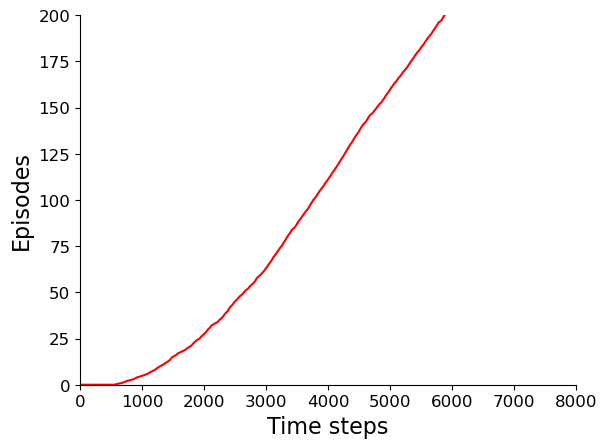

In [4]:
episodes_per_timestep(history)

### Optimal State Values and Optimal Policy

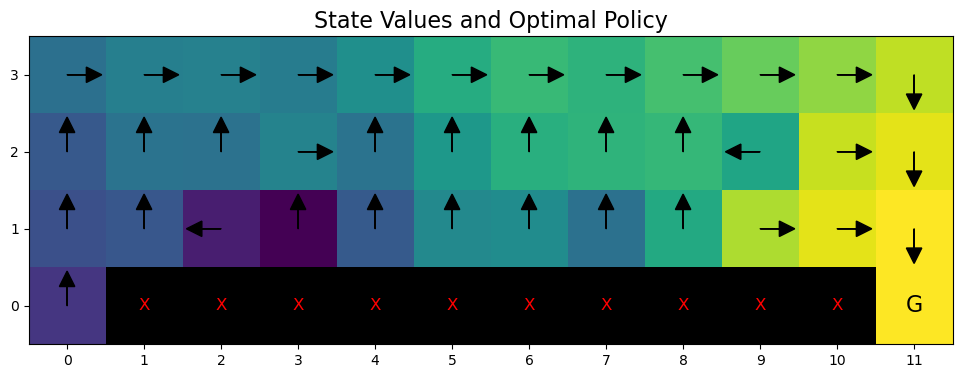

In [5]:
state_value_function, optimal_policy = get_optimal_value_function_and_policy(state_action_function, STATES, ACTIONS)
plot_optimal_policy_and_state_values(state_value_function, optimal_policy, ACTIONS)

### Optimal trajectory

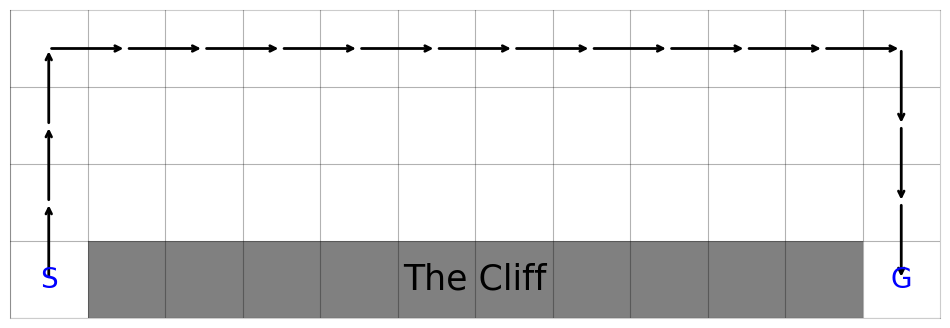

In [6]:
env.reset()
optimal_trajectory = find_optimal_trajectory(env, optimal_policy, ACTIONS)
plot_trajectory(optimal_trajectory)

## Q-Learning

### Run simulation

In [7]:
%%time
q_learning_agent = QLearningAgent(env, ACTIONS, alpha=0.5, epsilon=0.1)
state_action_function, history = q_learning_agent.run_simulation(n_episodes=100000)

CPU times: user 36.5 s, sys: 212 ms, total: 36.7 s
Wall time: 36.7 s


### Episodes per timestep

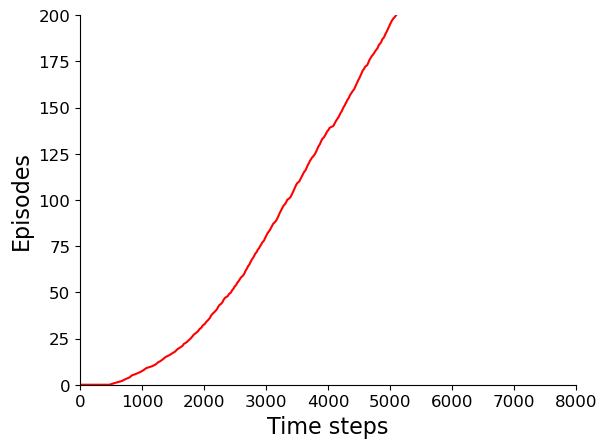

In [8]:
episodes_per_timestep(history)

### Optimal State Values and Optimal Policy

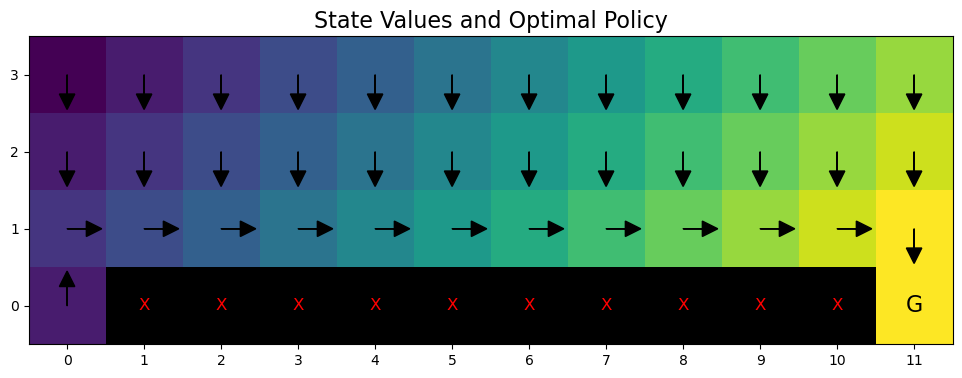

In [9]:
state_value_function, optimal_policy = get_optimal_value_function_and_policy(state_action_function, STATES, ACTIONS)
plot_optimal_policy_and_state_values(state_value_function, optimal_policy, ACTIONS)

### Optimal trajectory

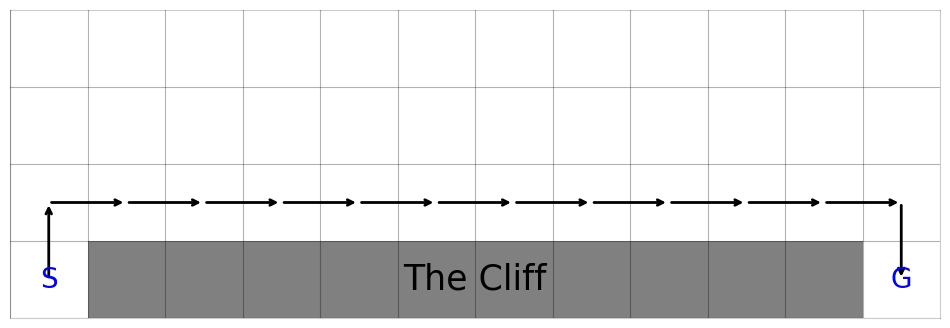

In [10]:
env.reset()
optimal_trajectory = find_optimal_trajectory(env, optimal_policy, ACTIONS)
plot_trajectory(optimal_trajectory)

## Expected Sarsa

### Run simulation

In [11]:
%%time
expected_sarsa_agent = ExpectedSarsaAgent(env, ACTIONS, alpha=0.5, epsilon=0.1)
state_action_function, history = expected_sarsa_agent.run_simulation(n_episodes=100000)

CPU times: user 1min 6s, sys: 204 ms, total: 1min 6s
Wall time: 1min 6s


### Episodes per timestep

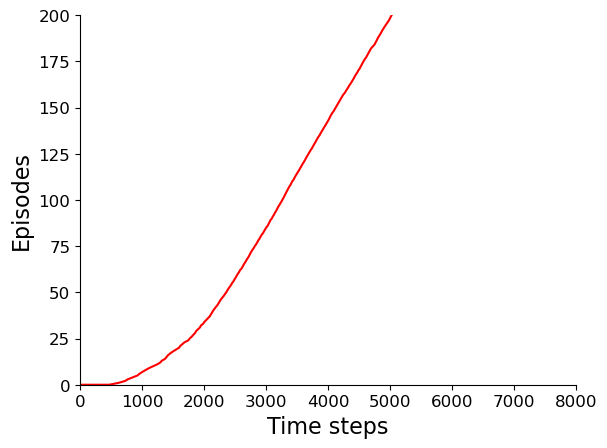

In [12]:
episodes_per_timestep(history)

### Optimal State Values and Optimal Policy

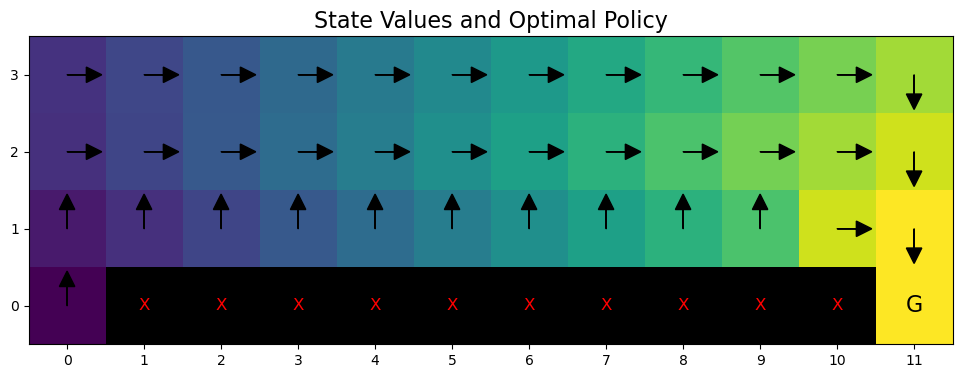

In [13]:
state_value_function, optimal_policy = get_optimal_value_function_and_policy(state_action_function, STATES, ACTIONS)
plot_optimal_policy_and_state_values(state_value_function, optimal_policy, ACTIONS)

### Optimal trajectory

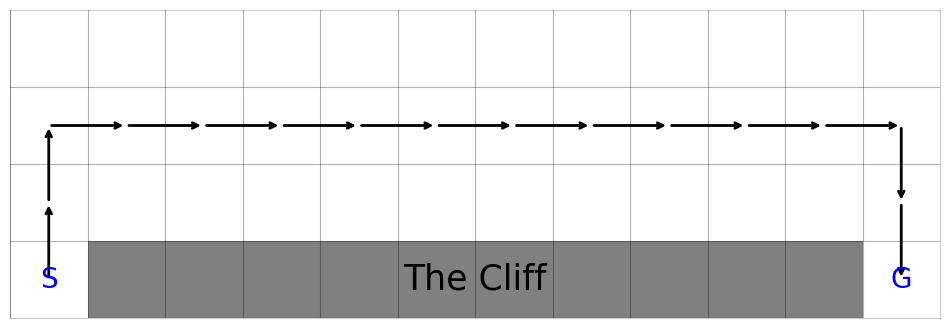

In [14]:
env.reset()
optimal_trajectory = find_optimal_trajectory(env, optimal_policy, ACTIONS)
plot_trajectory(optimal_trajectory)

## Compare average rewards

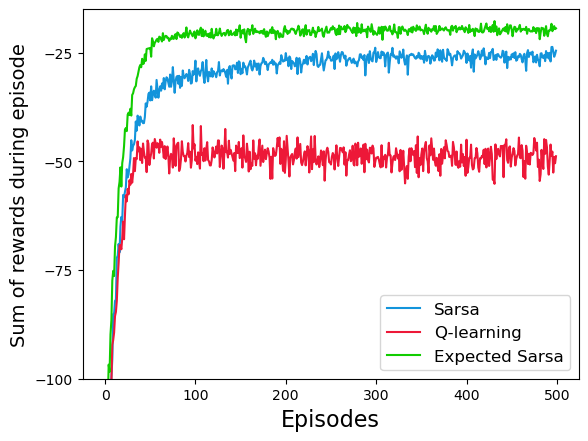

In [15]:
avg_reward_sarsa = avg_rewards_per_episode(sarsa_agent)
avg_reward_q_learning = avg_rewards_per_episode(q_learning_agent)
avg_reward_expected_sarsa = avg_rewards_per_episode(expected_sarsa_agent)

results = [{"data": {"x": avg_reward_sarsa["episode"], "y": avg_reward_sarsa["reward"]},
           "param": {"label": "Sarsa", "color": "#1394DB"}},
           {"data": {"x": avg_reward_q_learning["episode"], "y": avg_reward_q_learning["reward"]},
            "param": {"label": "Q-learning", "color": "#ED1838"}},
           {"data": {"x": avg_reward_expected_sarsa["episode"], "y": avg_reward_expected_sarsa["reward"]},
            "param": {"label": "Expected Sarsa", "color": "#11CC00"}},
          ]

plot_avg_rewards(results)